<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [223]:
import numpy as np
import scipy 
import seaborn as sns
import pandas as pd

import patsy

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [224]:
fn_prefix = '/Users/kiefer/github-repos/data_repos/san_francisco/san_francisco/'


In [225]:
# Load in assessor's office data, which has housing value info.
assess07 = pd.read_csv(fn_prefix+'assessor_office/assessor_data_2007_2008.csv')
assess08 = pd.read_csv(fn_prefix+'assessor_office/assessor_data_2008_2009.csv')
assess09 = pd.read_csv(fn_prefix+'assessor_office/assessor_data_2009_2010.csv')
assess10 = pd.read_csv(fn_prefix+'assessor_office/assessor_data_2010_2011.csv')
assess11 = pd.read_csv(fn_prefix+'assessor_office/assessor_data_2011_2012.csv')
assess12 = pd.read_csv(fn_prefix+'assessor_office/assessor_data_2012_2013.csv')
assess13 = pd.read_csv(fn_prefix+'assessor_office/assessor_data_2013_2014.csv')
assess14 = pd.read_csv(fn_prefix+'assessor_office/assessor_data_2014_2015.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (4,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [226]:
assess14.head(2)

,PROPLOC,RP1NBRCDE,RP1PRCLID,BASELOT,BASELOTSFX,RP1VOLUME,RP1CLACDE,YRBLT,BATHS,BEDS,...,EXEMPTYPE,RP1STACDE,RP1EXMVL2,RP1EXMVL1,ROLLYEAR,RECURRSALD,RP1FXTVAL,RP1IMPVAL,RP1LNDVAL,RP1PPTVAL
0,0000 0000 0000,08H,0001 001,0,NaN,1,G,1900,0,0,...,NaN,N,0,0,14,0,0,0,0,0
1,0000 0000 0000,08H,0002 001,0,NaN,1,G,1900,0,0,...,NaN,N,0,0,14,0,0,0,0,0


In [227]:
assess14.columns

Index([u'PROPLOC', u'RP1NBRCDE', u'RP1PRCLID', u'BASELOT', u'BASELOTSFX',
       u'RP1VOLUME', u'RP1CLACDE', u'YRBLT', u'BATHS', u'BEDS', u'ROOMS',
       u'STOREYNO', u'UNITS', u'CHGDATE', u'REMARKFLA', u'KITCHEN', u'BUILTIN',
       u'ZONE', u'CONSTTYPE', u'DEPTH', u'FRONT', u'SQFT', u'FBA', u'LAREA',
       u'LOTCODE', u'REPRISDATE', u'RP1RECDAT1', u'RP1DOCNO1', u'RP1DOCNO2',
       u'RP1TRACDE', u'OWNRPRCNT', u'EXEMPTYPE', u'RP1STACDE', u'RP1EXMVL2',
       u'RP1EXMVL1', u'ROLLYEAR', u'RECURRSALD', u'RP1FXTVAL', u'RP1IMPVAL',
       u'RP1LNDVAL', u'RP1PPTVAL'],
      dtype='object')

    PROPLOC,Property Location,"Situs/Location, as well as room/unit number"
    RP1NBRCDE,Neighborhood Code,ASR neighborhood code based on MLS districts
    RP1PRCLID,Block and Lot Number,Block and Lot Number (Full APN)
    RP1VOLUME,Volume Number,Volume number
    RP1CLACDE,Property Class Code,Property type
    YRBLT,Year Property Built,Year improvement was built (can be blend of original and newer constructon)
    BATHS,Number of Bathrooms,Number of bathrooms (BA with no shower or tub is 1/2 bathroom)
    BEDS,Number of Bedrooms,Number of bedrooms (bedrooms have a closet)
    ROOMS,Number of Rooms,"Number of rooms, excluding bathrooms, halls, closets, etc."
    STOREYNO,Number of Stories,Number of stories
    UNITS,Number of Units,Number of units
    CHGDATE,Characteristics Change Date (YYMM),Date of change to property characteristics
    ZONE,Zoning Code,Zone code
    CONSTTYPE,Construction Type,Generally type of construction
    DEPTH,Lot Depth,Depth of lot in linear feet
    FRONT,Lot Frontage,Linear footage of front facing side of lot (front foot)
    SQFT,Property Area in Square Feet,Same as lot area
    FBA,Basement Area,Square footage of basement
    LAREA,Lot Area,Square footage of lot
    LOTCODE,Lot Code,"lot shapes, could be Rectangle, Square or Other"
    REPRISDATE,Prior Sales Date (YYMMDD),prior sale date
    RP1RECDAT1,RECORDATION DATE ‘99/99/99’,Recordation date (YYMMDD)
    RP1DOCNO1,Document Number,Recorded document number #1
    RP1DOCNO2,Document Number,Recorded document number #2
    RP1TRACDE,Tax Rate Area Code,Tax rate dependent on location within the City
    OWNRPRCNT,Percent of Ownership,Percent of ownership
    EXEMPTYPE,Closed Roll Exemption Type Code,Exemption Code (see below for descriptions)
    RP1STACDE,Closed Roll Status Code,"i.e. Taxable, Non-Taxable, SBE, etc."
    RP1EXMVL2,Closed Roll Misc. Exemption Value,Exemptions such as welfare
    RP1EXMVL1,Closed Roll Homeowner Exemption Value,Homeowner's exemption
    ROLLYEAR,Closed Roll Year,Roll Year
    RECURRSALD,Current Sales Date (YYMMDD),current sale date
    RP1FXTVAL,Closed Roll Assessed Fixtures Value,Assessed value of fixtures
    RP1IMPVAL,Closed Roll Assessed Improvement Value,Assessed value of improvements
    RP1LNDVAL,Closed Roll Assessed Land Value,Assessed value of land
    RP1PPTVAL,Closed Roll Assessed Personal Prop Value,Assessed value of personal property

In [228]:
# add in dates corresponding to datasets:
assess07['YEAR'] = 2007
assess08['YEAR'] = 2008
assess09['YEAR'] = 2009
assess10['YEAR'] = 2010
assess11['YEAR'] = 2011
assess12['YEAR'] = 2012
assess13['YEAR'] = 2013
assess14['YEAR'] = 2014

In [229]:
# remove any non-consistent columns:
colset = None
for a in [assess07, assess08, assess09, assess10, assess11, assess12, assess13, assess14]:
    if colset == None:
        colset = set(list(a.columns))
    else:
        c = set(list(a.columns))
        colset = colset & c
        
for a in [assess07, assess08, assess09, assess10, assess11, assess12, assess13, assess14]:
    a = a[list(colset)]

In [230]:
# combine:
assess = pd.concat([assess07, assess08, assess09, assess10, assess11, assess12, assess13, assess14],
                   axis=0)

for a in [assess07, assess08, assess09, assess10, assess11, assess12, assess13, assess14]:
    del a

In [231]:
print assess.shape
print assess.head(2)

(1612110, 42)
   BASELOT BASELOTSFX  BATHS  BEDS  BUILTIN  CHGDATE CONSTTYPE  DEPTH  \
0      NaN        NaN      0     0      NaN     9908       NaN    0.0   
1      NaN        NaN      0     0      NaN     9908       NaN    0.0   

  EXEMPTYPE  FBA  ...   RP1RECDAT1 RP1STACDE  RP1TRACDE RP1VOLUME  SQFT  \
0       NaN  0.0  ...     970216.0         N     1000.0         1     0   
1       NaN  0.0  ...     690229.0         N     1000.0         1     0   

  STOREYNO  UNITS  YEAR  YRBLT  ZONE  
0        0      0  2007   1900     P  
1        0      0  2007   1900    C2  

[2 rows x 42 columns]


In [232]:
# check nulls:
assess.isnull().sum()

BASELOT       1405294
BASELOTSFX    1612065
BATHS               0
BEDS                0
BUILTIN       1405294
CHGDATE             0
CONSTTYPE      254613
DEPTH               0
EXEMPTYPE      871407
FBA                 1
FRONT               0
KITCHEN       1584075
LAREA               1
LOTCODE       1042784
OWNRPRCNT           1
PROPLOC             0
RECURRSALD          1
REMARKFLA     1609999
REPRISDATE    1612110
ROLLYEAR            1
ROOMS               0
RP1CLACDE         858
RP1DOCNO1      976363
RP1DOCNO2           1
RP1EXMVL1           1
RP1EXMVL2           1
RP1FXTVAL           1
RP1IMPVAL           1
RP1LNDVAL           1
RP1NBRCDE         679
RP1PPTVAL           1
RP1PRCLID           0
RP1RECDAT1          1
RP1STACDE     1583521
RP1TRACDE        4368
RP1VOLUME           0
SQFT                0
STOREYNO            0
UNITS               0
YEAR                0
YRBLT               0
ZONE           218235
dtype: int64

In [233]:
# remove dramatically null columns:
badcols = assess.isnull().sum()
badcols = badcols[badcols > 300000]
badcols = badcols.index

In [234]:
badcols

Index([u'BASELOT', u'BASELOTSFX', u'BUILTIN', u'EXEMPTYPE', u'KITCHEN',
       u'LOTCODE', u'REMARKFLA', u'REPRISDATE', u'RP1DOCNO1', u'RP1STACDE'],
      dtype='object')

In [235]:
assess = assess.iloc[:, ~assess.columns.isin(badcols)]

In [236]:
assess.columns

Index([u'BATHS', u'BEDS', u'CHGDATE', u'CONSTTYPE', u'DEPTH', u'FBA', u'FRONT',
       u'LAREA', u'OWNRPRCNT', u'PROPLOC', u'RECURRSALD', u'ROLLYEAR',
       u'ROOMS', u'RP1CLACDE', u'RP1DOCNO2', u'RP1EXMVL1', u'RP1EXMVL2',
       u'RP1FXTVAL', u'RP1IMPVAL', u'RP1LNDVAL', u'RP1NBRCDE', u'RP1PPTVAL',
       u'RP1PRCLID', u'RP1RECDAT1', u'RP1TRACDE', u'RP1VOLUME', u'SQFT',
       u'STOREYNO', u'UNITS', u'YEAR', u'YRBLT', u'ZONE'],
      dtype='object')

In [237]:
# drop the rest of the nulls:
assess.dropna(inplace=True)
print assess.shape

(1326151, 32)


In [238]:
# check datatypes:
assess.dtypes

BATHS           int64
BEDS            int64
CHGDATE         int64
CONSTTYPE      object
DEPTH         float64
FBA           float64
FRONT         float64
LAREA         float64
OWNRPRCNT     float64
PROPLOC        object
RECURRSALD    float64
ROLLYEAR      float64
ROOMS           int64
RP1CLACDE      object
RP1DOCNO2     float64
RP1EXMVL1     float64
RP1EXMVL2     float64
RP1FXTVAL     float64
RP1IMPVAL     float64
RP1LNDVAL     float64
RP1NBRCDE      object
RP1PPTVAL     float64
RP1PRCLID      object
RP1RECDAT1    float64
RP1TRACDE     float64
RP1VOLUME       int64
SQFT            int64
STOREYNO        int64
UNITS           int64
YEAR            int64
YRBLT           int64
ZONE           object
dtype: object

In [239]:
# combine value cols into target and remove those cols:
valcols = ['RP1FXTVAL','RP1IMPVAL','RP1LNDVAL',
           'RP1PPTVAL']

assess['VALUE'] = assess[valcols].sum(axis=1)

assess = assess.iloc[:, ~assess.columns.isin(valcols)]



In [240]:
# Filter to single family homes
assess.RP1CLACDE.unique()

single_fam_codes = ['CO','COS','D','DBM','LZ','LZBM',
                    'TH','THBM','Z','ZBM']

assess = assess[assess['RP1CLACDE'].isin(single_fam_codes)]

In [241]:
assess.UNITS.value_counts()

1      922595
0        6997
2         426
3          90
4          30
6          21
5          18
300         8
84          8
54          8
101         6
192         4
107         4
66          4
23          4
11          3
Name: UNITS, dtype: int64

In [242]:
# restrict to 1-unit homes:
assess = assess[assess.UNITS == 1]

In [243]:
# remove properties purportedly worth less than 30,000:
assess = assess[assess.VALUE > 30000]
print assess.shape

(917161, 29)


In [244]:
# remove columns that aren't too useful:
remove_cols = ['CHGDATE','CONSTTYPE','PROPLOC',
               'RECURRSALD','RP1DOCNO2','RP1DOCNO1',
               'RP1EXMVL1','RP1EXMVL2','RP1EXMVL3',
               'RP1PRCLID','ROLLYEAR','UNITS',
               'RP1RECDAT1','LAREA']

assess = assess.iloc[:, ~assess.columns.isin(remove_cols)]

In [245]:
for c in assess.columns:
    print c, assess[c].values[0:3], assess[c].value_counts().shape[0]

BATHS [2 1 2] 23
BEDS [4 1 2] 19
DEPTH [ 80.   0.   0.] 1130
FBA [    0.  1177.     0.] 1441
FRONT [ 0.  0.  0.] 21
OWNRPRCNT [ 0.815  1.     1.   ] 902
ROOMS [12  4  5] 57
RP1CLACDE ['D' 'Z' 'Z'] 8
RP1NBRCDE ['08E' '08E' '08E'] 88
RP1TRACDE [ 1000.  1000.  1000.] 11
RP1VOLUME [1 1 1] 44
SQFT [3402 1177 1419] 4677
STOREYNO [3 0 0] 29
YEAR [2007 2007 2007] 8
YRBLT [1989 1907 1907] 182
ZONE ['RH3' 'RH3' 'RH3'] 82
VALUE [  392296.   585063.  1002840.] 375199


In [246]:
# replace column names:
repcols = {
    'VALUE':'value',
    'ZONE':'zone',
    'YRBLT':'year_built',
    'YEAR':'year_recorded',
    'STOREYNO':'stories',
    'SQFT':'sqft',
    'RP1VOLUME':'volume',
    'RP1TRACDE':'tax_rate',
    'RP1NBRCDE':'neighborhood',
    'RP1CLACDE':'property_class',
    'ROOMS':'rooms',
    'OWNRPRCNT':'owner_pct',
    'FRONT':'front_ft',
    'FBA':'basement_area',
    'DEPTH':'lot_depth',
    'BEDS':'beds',
    'BATHS':'baths'
}

assess.rename(columns=repcols, inplace=True)

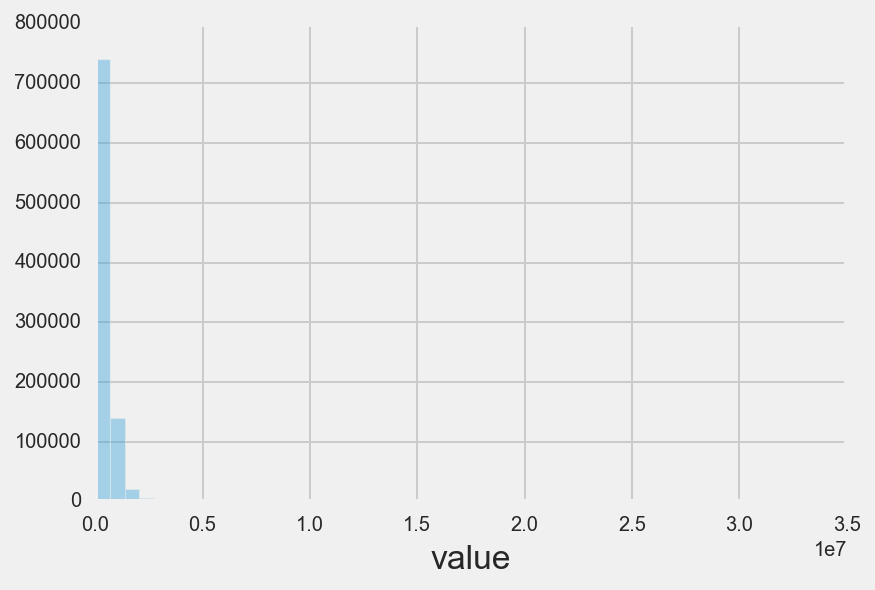

In [247]:
# some VERY high value properties... big outliers.
sns.distplot(assess.value, kde=False)

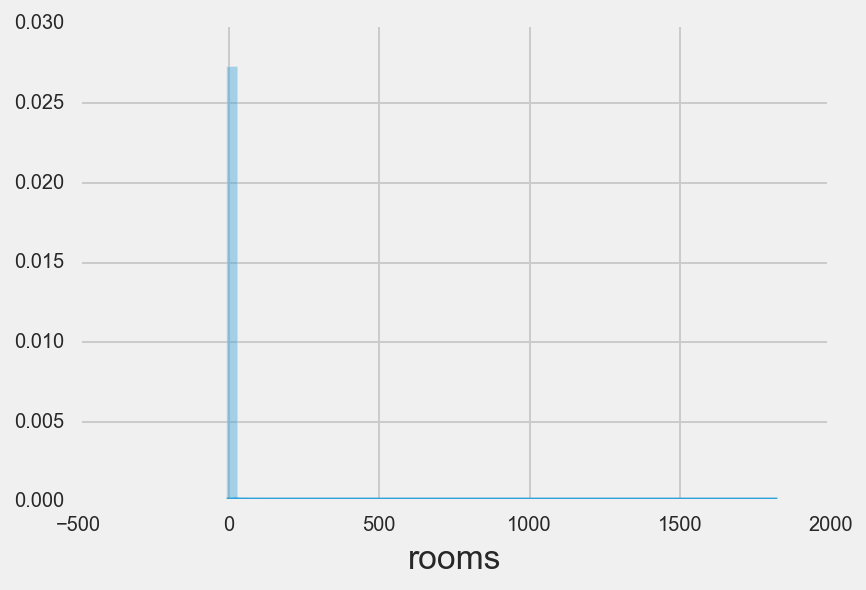

In [248]:
# obviously insane outliers in rooms that must be removed.
sns.distplot(assess.rooms)

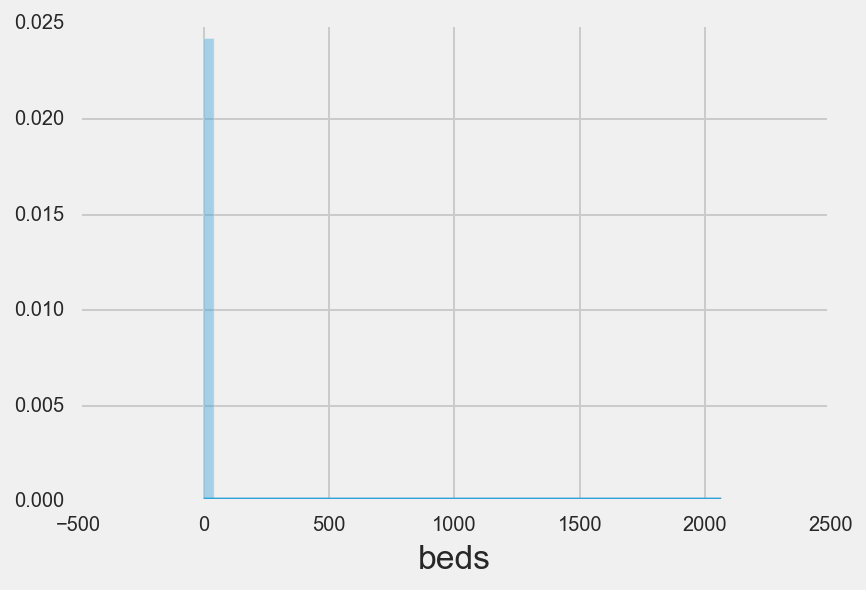

In [249]:
# as well as beds.
sns.distplot(assess.beds)

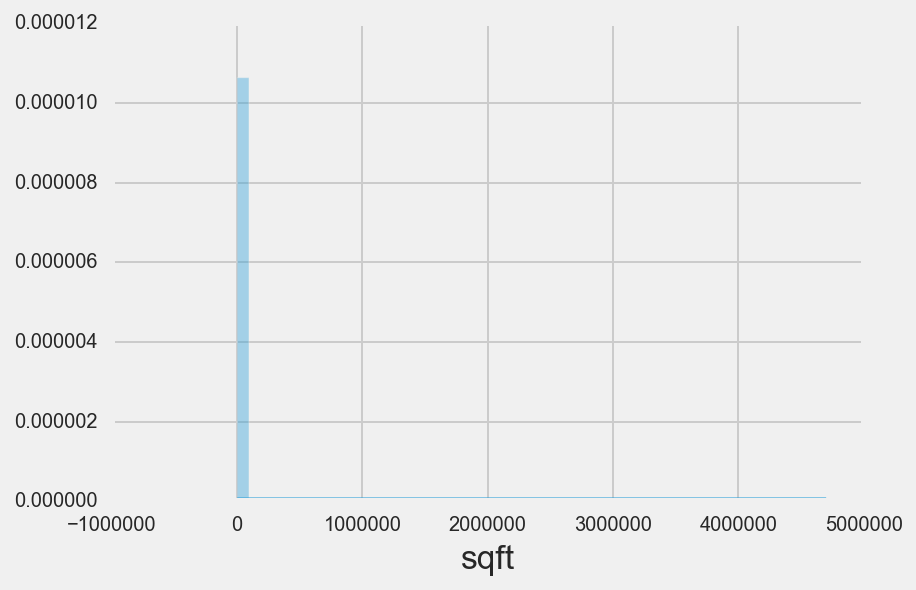

In [250]:
# and sqft...
sns.distplot(assess.sqft)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [251]:
# Variables should now be clear from my renaming. 
#
# We've got some real nasty outliers. Std. dev outlier thresholds aren't going
# to work well since they will be super inflated by the outliers. I will use
# percentile thresholds with cutoffs 1st and 99th percentiles.

# Print out mins, maxes per col:

In [252]:
# checkpoint with a copy
design = assess.copy()
design.shape

(917161, 17)

In [253]:
for c in design.columns:
    print c, design[c].min(), design[c].max()
# There's even some negatives in there..


baths 0 1002
beds 0 2065
lot_depth 0.0 99.87
basement_area -883.0 8880.0
front_ft 0.0 54.0
owner_pct 0.0 1.0
rooms -7 1824
property_class CO ZBM
neighborhood 01A 10K
tax_rate 1000.0 1019.0
volume 1 44
sqft 0 4701100
stories 0 496
year_recorded 2007 2014
year_built 0 8583
zone 24MISS VALEN
value 30005.0 33812814.0


In [254]:
baths_max = np.percentile(design.baths.values, 99.0)
print baths_max
design = design[design.baths < baths_max]
print design.shape

4.0
(891347, 17)


In [255]:
beds_max = np.percentile(design.beds.values, 99.0)
print beds_max
design = design[design.beds < beds_max]
print design.shape

5.0
(880675, 17)


In [256]:
depth_max = np.percentile(design.lot_depth.values, 99.0)
print depth_max
design = design[design.lot_depth < depth_max]
print design.shape

93.4
(871866, 17)


In [257]:
design = design[design.basement_area >= 0]
basement_max = np.percentile(design.basement_area.values, 99.0)
print basement_max
design = design[design.basement_area < basement_max]
print design.shape

800.0
(863017, 17)


In [258]:
print design.front_ft.unique()

[  0.    27.    40.    31.73  25.    43.    50.    24.79  26.    34.    28.
  15.99  12.    33.33  27.5   22.94  25.13]


In [259]:
design = design[design.rooms > 0]
rooms_max = np.percentile(design.rooms.values, 99.0)
print rooms_max
design = design[design.rooms < rooms_max]
print design.shape

10.0
(823405, 17)


In [260]:
print design.volume.unique()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]


In [261]:
vol_max = np.percentile(design.volume.values, 99.0)
print vol_max

44.0


In [262]:
sqft_max = np.percentile(design.sqft.values, 99.0)
sqft_min = np.percentile(design.sqft.values, 1.0)
print sqft_max, sqft_min
design = design[(design.sqft > sqft_min) & (design.sqft < sqft_max)]
print design.shape

3050.96 494.0
(806922, 17)


In [263]:
stories_max = np.percentile(design.stories.values, 99.0)
print stories_max
# going to keep 4 in here..
design = design[design.stories <= stories_max]
print design.shape

4.0
(798920, 17)


In [264]:
yb_min = np.percentile(design.year_built.values, 1.0)
print yb_min
design = design[(design.year_built > yb_min) & (design.year_built <= 2015)]
print design.shape


1900.0
(754161, 17)


In [265]:
# check for too small property classes and neighborhoods:
design.property_class.value_counts()

D      627017
Z      120853
LZ       3402
ZBM      1479
TH        929
DBM       467
COS         8
CO          6
Name: property_class, dtype: int64

In [266]:
design = design[~design.property_class.isin(['COS','CO'])]

In [267]:
design.neighborhood.value_counts()

02D    37210
10C    35989
02E    34567
02B    33657
02C    26810
10F    24527
10E    23244
01E    22061
09G    21919
10B    19566
10A    17638
01A    17188
10D    16624
10H    16272
04H    15238
02F    15025
07B    14563
05C    14425
10G    14425
04S    13885
05A    12649
03H    12179
09E    11817
04B     9827
03G     9691
08F     9480
03J     9457
09A     9357
05K     9264
02G     9118
       ...  
05G     3331
04D     3292
05M     3207
05B     3199
10J     3139
05H     3066
03C     2854
04G     2448
08B     2376
01C     2209
04K     2150
06D     2048
06F     1993
06B     1992
07C     1976
04M     1871
03F     1845
04A     1710
01F     1666
08H     1592
06A     1547
05F     1404
03D     1402
08D     1253
09D     1193
09B      807
05J      751
06E      528
047      139
08I      112
Name: neighborhood, dtype: int64

In [268]:
# Lets see those charts from earlier again.

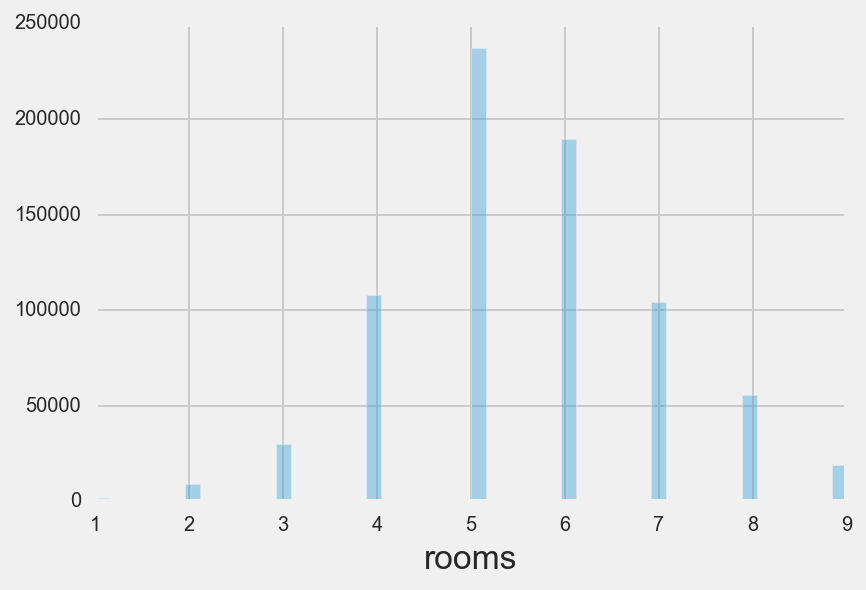

In [269]:
sns.distplot(design.rooms, kde=False)

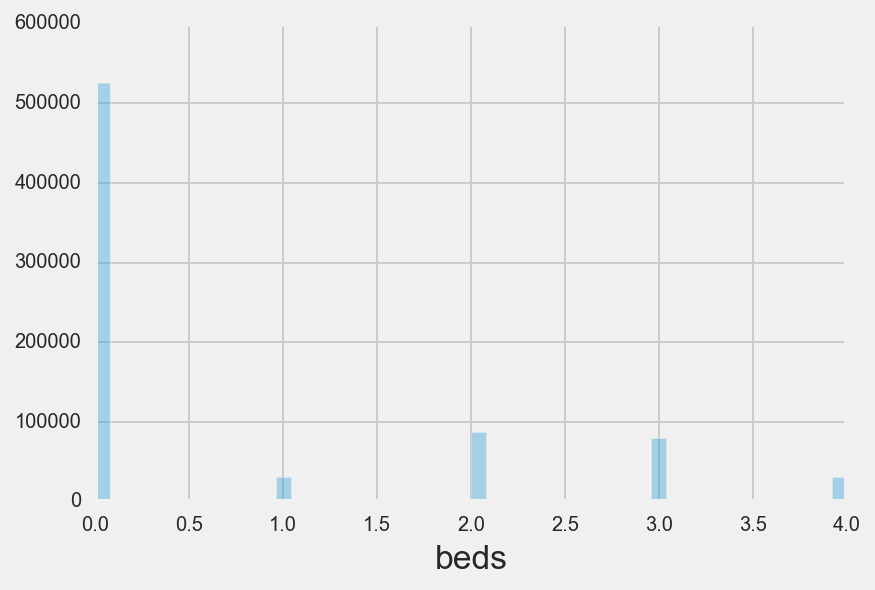

In [270]:
sns.distplot(design.beds, kde=False)

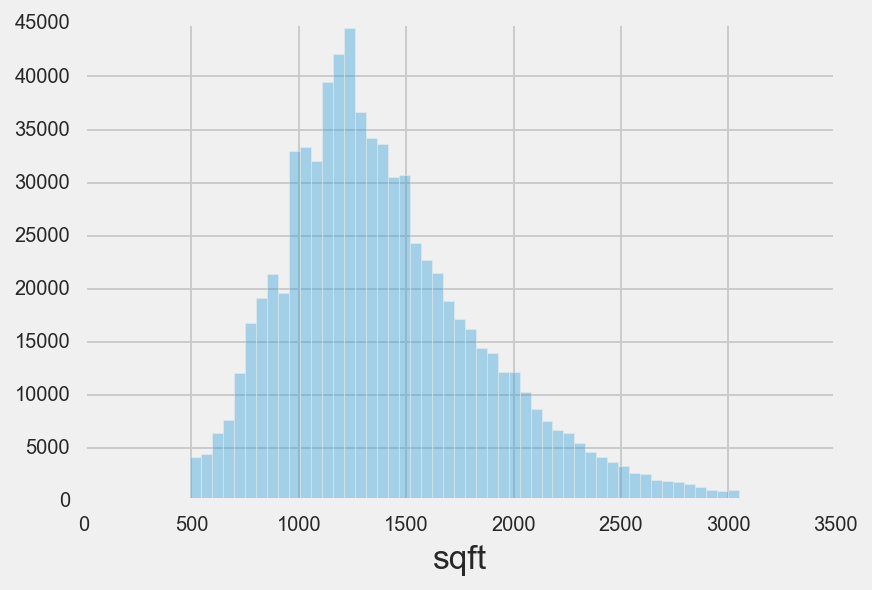

In [271]:
sns.distplot(design.sqft, kde=False)

In [50]:
# Save the design matrix:
import cPickle
f = open(fn_prefix+'assessor_office/design.p','w')
cPickle.dump(design, f)
f.close()

# construct the X,y matrices:
# use patsy to construct matrices:
f = 'value ~ '+' + '.join([c for c in design.columns if not c == 'value'])+' -1'
y, X = patsy.dmatrices(f, data=design, return_type='dataframe')
y = y.values.ravel()
print y.shape, X.shape

(754147,) (754147, 177)


In [51]:
# free up some memory:
del assess

In [52]:
# Get out feature names in case i lose them later.
feature_names = X.columns

In [3]:
# linear regression:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, KFold, train_test_split

In [53]:
linreg = LinearRegression()
linreg.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
# straight-up R2:
linreg.score(X, y)
# not GREAT, but at least positive.

0.28326835223909874

In [55]:
# train test split with 33% left out.
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.33)

In [56]:
# train/test split holdout R2:
linreg.fit(Xtr, ytr)
holdoutr2 = linreg.score(Xte, yte)
print holdoutr2
# holdout has slightly worse R2

0.28312633585


In [57]:
# cross-val with KFold using 10 folds
cv_folds = KFold(len(y), n_folds=8)

scores = []
for i, (train_inds, test_inds) in enumerate(cv_folds):
    Xtr, Xte = X.iloc[train_inds, :], X.iloc[test_inds, :]
    ytr, yte = y[train_inds], y[test_inds]
    linreg.fit(Xtr, ytr)
    score = linreg.score(Xte, yte)
    print 'fold', i, score
    scores.append(score)
    
print 'Mean cv score:', np.mean(scores)

fold 0 0.235075870162
fold 1 0.240891141052
fold 2 0.261654110004
fold 3 0.273382943703
fold 4 0.285991363429
fold 5 0.294538329555
fold 6 0.310091338213
fold 7 0.303100150725
Mean cv score: 0.275590655855


In [58]:
# cross-validated score isn't bad, as in, its decently close to the full score.
# It's not terribly high, but it is consistent across folds, so it makes me much
# more confident that we can trust the model to the extent of the variance it
# does explain.
fullr2 = linreg.fit(X,y).score(X,y)

cvr2 = np.mean(scores)

In [59]:
print fullr2, holdoutr2, cvr2

0.283268352239 0.287578096884 0.275590655855


(0.26, 0.29)

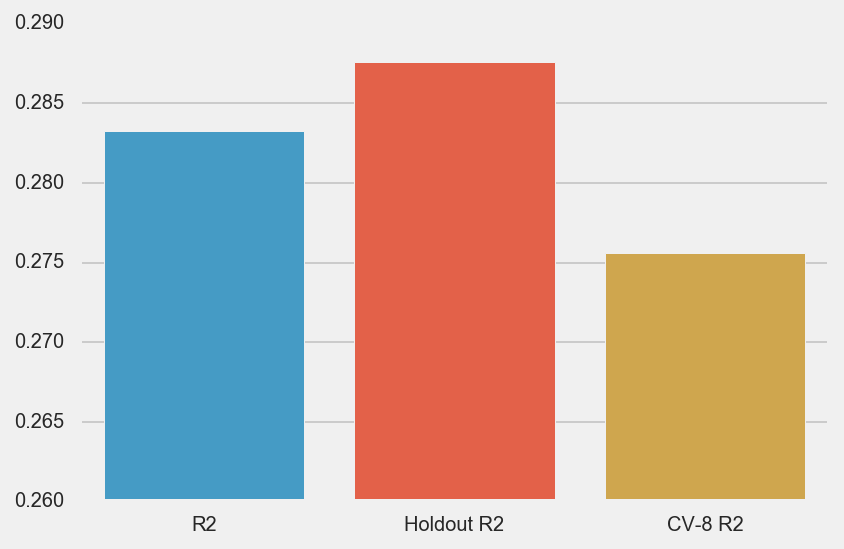

In [60]:
ax = sns.barplot(x=['R2','Holdout R2','CV-8 R2'],
                 y=[fullr2, holdoutr2, cvr2])
ax.set_ylim([0.26,0.29])

In [62]:
# Plot a sample of the predicted values vs. true values:
linreg.fit(X,y)
pred = linreg.predict(X)

sampi = np.random.choice(range(len(y)), size=10000, replace=False)
psamp = pred[sampi]
ysamp = y[sampi]


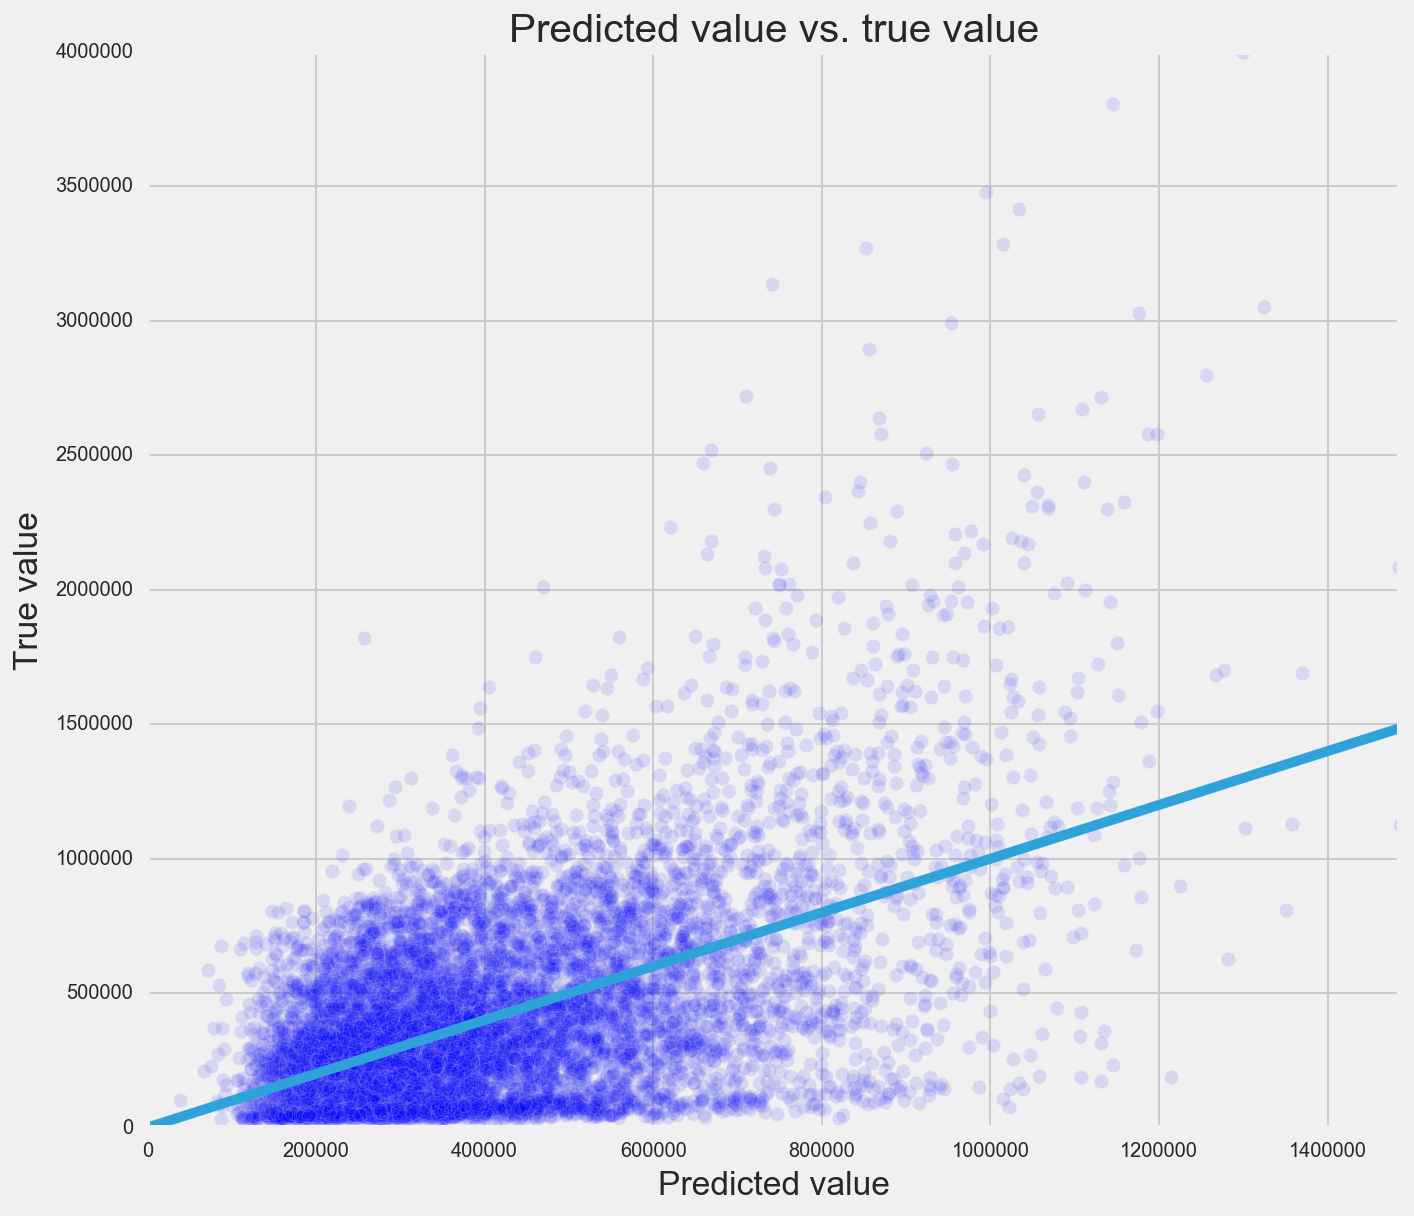

In [65]:
fig, ax = plt.subplots(figsize=(10,9))

ax.scatter(psamp, ysamp, alpha=0.10, s=50)
ax.plot([0, np.max(psamp)], [0, np.max(psamp)], lw=5)
ax.set_title('Predicted value vs. true value')
ax.set_ylabel('True value')
ax.set_xlabel('Predicted value')
ax.set_xlim([0, np.max(psamp)])
ax.set_ylim([0, np.max(ysamp)])

plt.show()


In [66]:
# Print out coefficients ranked by absolute value descending:
coefs = pd.DataFrame({
        'coefs':linreg.coef_,
        'abscoef':np.abs(linreg.coef_),
        'predictor':feature_names
    })

coefs.sort_values('abscoef', ascending=False, inplace=True)
coefs.drop('abscoef', axis=1, inplace=True)
coefs

,coefs,predictor
67,762463.987455,neighborhood[T.08B]
100,-742636.321686,zone[T.CVR]
97,-721691.341453,zone[T.CCB]
116,714976.346164,zone[T.P/RH1]
64,684769.009663,neighborhood[T.07C]
99,-642334.351736,zone[T.CRNC]
70,517024.681750,neighborhood[T.08E]
73,513986.224326,neighborhood[T.08H]
120,507977.621918,zone[T.RC1]
65,506174.869608,neighborhood[T.07D]


In [70]:
# let's take out the effect of zone, property class, and neighborhood and then try the other variables.
# How? well first we can fit a linear regression with just zone, property class, and neighborhood,
# then take the residuals out of that and predict those with the other variables.
zone_neigh = patsy.dmatrix('~ zone + property_class + neighborhood -1', data=design, return_type='dataframe')
resids = y - linreg.fit(zone_neigh, y).predict(zone_neigh)

remain_f = '~ '+' + '.join([c for c in design.columns if not c in ['value', 'zone', 
                                                                   'neighborhood', 'property_class']])+' -1'

Xremain = patsy.dmatrix(remain_f, data=design, return_type='dataframe')

linreg.fit(Xremain, resids)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
# Re-rank the coefficients:
coefs = pd.DataFrame({
        'coefs':linreg.coef_,
        'abscoef':np.abs(linreg.coef_),
        'predictor':Xremain.columns
    })

coefs.sort_values('abscoef', ascending=False, inplace=True)
coefs.drop('abscoef', axis=1, inplace=True)
coefs

,coefs,predictor
5,-168370.065721,owner_pct
1,48891.579186,beds
0,43323.282940,baths
6,-19221.182826,rooms
11,9783.384212,year_recorded
4,5895.925107,front_ft
10,2210.399838,stories
8,983.889261,volume
2,465.723549,lot_depth
12,-348.102434,year_built


In [73]:
# overall full model,  R2:
print 'Full model R2:', linreg.score(Xremain, resids)

# crossval R2:
scores = cross_val_score(linreg, Xremain, resids, cv=8, verbose=1)
print 'CV R2s:', scores
print 'CV mean R2:', np.mean(scores)

Full model R2: 0.104722314689
CV R2s: [ 0.06557467  0.07163465  0.08271297  0.09341873  0.10157322  0.10695182
  0.12122063  0.12181858]
CV mean R2: 0.095613159095


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.2s finished


In [ ]:
# Looks like there is still a solid above-zero crossvalidated R2, with low
# variance in cross-validation train-test splits.
# Looking at the coefficients, we can see that there is a positive effect of the 
# variables we would expect such as stories, sqft, beds, baths...
# Oddly, rooms has a negative effect. This would require some more investigation
# since it doesn't make a tone of sense.
# Higher tax rate also has a negative impact on value, which seems wrong.
# It is interesting that the newer the house is, the less valuable it seems to
# be. I would have expected the opposite but perhaps older houses tend to be the
# more mansion-y homes in SF. On the other hand, "year_recorded", which is the 
# year in which the record was taken in the data, has a positive value on 
# value, which is in line with increasing value over time.
# Percent of the property owned by the owner has a negative effect. Not too 
# surprising. Bigger houses cost more and so owners may have a much smaller
# proportion than the bank.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ be negative when the model is tested on new data?

**1.** Negative $R^2$ values in cross-validation means that your model does so poorly on the held-out test set that it is worse than guessing the mean value of the target variable.

**2.** This question actually had a typo... sorry! $R^2$ can be negative scored on test data and not the model scored on the training data because on the training data the model would simply choose the baseline model if there were no information gained by the predictor variables. On testing data, even if the model were to choose the baseline on training, there is a chance the training baseline is worse than the mean of the testing target variable. Basically, there is no guarantee on testing data that the model can perform as well or better than the mean of the target.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [31]:
# I'm going to try and predict whether there was a fire (and how many) YESTERDAY 
# based on the amount of crime TODAY.
# Yeah - it's weird, but I figured I'd try it out. Why not? My thinking here is that maybe
# there are more crimes later when there are more fires... maybe people are ready to loot
# and cause trouble. We'll find out soon enough.

# I'm restricting the dates to be between 2005 and 2015:
import datetime
min_date = datetime.datetime(2005, 1, 1)
max_date = datetime.datetime(2015, 1, 1)


In [70]:
# load the crime data
crime = pd.read_csv(fn_prefix+'sf_crime/sfpd_incidents_from2003.csv')

In [203]:
crime.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110914565,WARRANTS,WARRANT ARREST,Friday,05/29/2015,16:42,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406971,37.772527,"(37.7725273607571, -122.406970988225)",11091456563010
1,11351210,MISSING PERSON,FOUND PERSON,Tuesday,06/14/2016,08:55,BAYVIEW,NONE,1200 Block of 3RD ST,-122.389518,37.772468,"(37.7724682400061, -122.389517648036)",1135121075000


In [204]:
# convert the date column to a datetime column, and restrict the dataset between the 
# date range i set up earlier.
crime['date'] = pd.to_datetime(crime.Date, infer_datetime_format=True)
crime = crime[(crime.date < max_date) & (crime.date > min_date)]

In [209]:
# Count the number of crimes, per category, that happened per day with this
# apply function.
def crime_count(df):
    df['crime_count'] = df.shape[0]
    df = df.reset_index(drop=True)
    return df.loc[0, ['date','Category','crime_count']]

crime_counts = crime.groupby(['date','Category']).apply(crime_count).reset_index(drop=True)
    

In [210]:
crime_counts.head()

,date,Category,crime_count
0,2005-01-02,ARSON,2
1,2005-01-02,ASSAULT,26
2,2005-01-02,BURGLARY,15
3,2005-01-02,DISORDERLY CONDUCT,3
4,2005-01-02,DRIVING UNDER THE INFLUENCE,1


In [211]:
# Widen back the data with pivot table.
crime_counts = pd.pivot_table(crime_counts, values='crime_count', columns=['Category'],
                              index=['date'], aggfunc=np.sum,
                              fill_value=0).reset_index()

In [213]:
# save so i don't have to do all this above if i screw up.
crime_counts.to_csv(fn_prefix+'sf_crime/crime_counts.csv', index=False)

In [26]:
# crime_counts = pd.read_csv(fn_prefix+'sf_crime/crime_counts.csv')
# crime_counts['date'] = pd.to_datetime(crime_counts.date, infer_datetime_format=True)

In [69]:
# load in the fire data:
fire = pd.read_csv(fn_prefix+'fire_data/fire_incidents.csv')

In [28]:
fire.head(2)

,Incident Number,Exposure Number,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,...,Detector Effectiveness,Detector Failure Reason,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,Neighborhood District,Location
0,9030109,0,310 Colon Av.,04/12/2009,91020273,04/12/2009 06:09:13 PM,04/12/2009 06:13:45 PM,04/12/2009 07:23:13 PM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13067402,0,20 Lansdale Av,07/18/2013,131990117,07/18/2013 10:32:03 AM,07/18/2013 10:37:15 AM,07/18/2013 10:39:55 AM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# like with the crime data, restrict the dates:
fire['date'] = pd.to_datetime(fire['Incident Date'], infer_datetime_format=True)
fire = fire[(fire.date > min_date) & (fire.date < max_date)]

In [33]:
# And also count up the number of fire incidents by date:
def fire_count(df):
    df['fire_count'] = df.shape[0]
    df = df.reset_index()
    return df.loc[0, ['date','fire_count']]

fire = fire[~fire.date.isnull()]
fire_counts = fire.groupby(['date']).apply(fire_count).reset_index(drop=True)
    

In [35]:
# there are some na values in the fire data so drop them.
fire_counts.dropna(inplace=True)
print fire_counts.shape
fire_counts.head()


(3651, 2)


,date,fire_count
0,2005-01-02,74
1,2005-01-03,82
2,2005-01-04,76
3,2005-01-05,72
4,2005-01-06,84


In [37]:
# merge the crime and fire together
crime_fire = fire_counts.merge(crime_counts, on=['date'], how='inner')

In [39]:
# sort by date ascending, and create a column for the number of fires yesterday.
crime_fire.sort_values('date', ascending=True, inplace=True)
crime_fire['fire_count_yesterday'] = crime_fire.fire_count.shift(1)

In [40]:
crime_fire.head()

,date,fire_count,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,...,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS,fire_count_yesterday
0,2005-01-02,74,2,26,0,0,15,3,1,11,...,0,0,11,0,2,15,50,9,2,NaN
1,2005-01-03,82,0,21,0,0,20,1,0,20,...,1,0,8,0,1,14,50,14,3,74.0
2,2005-01-04,76,0,32,0,0,19,2,1,35,...,2,0,9,0,3,12,60,13,4,82.0
3,2005-01-05,72,1,30,0,0,15,2,0,35,...,1,0,11,0,3,12,52,27,0,76.0
4,2005-01-06,84,2,41,0,0,31,1,0,26,...,2,1,5,0,4,18,38,19,1,72.0


In [42]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler

In [43]:
# Time to try out some different models. Create the target and predictor matrices
# and normalize the predictor matrix (since we're doing regularization).

crime_fire.dropna(inplace=True)
y = crime_fire.fire_count_yesterday.values
X = crime_fire[[c for c in crime_fire.columns if not c in ['date','fire_count','fire_count_yesterday']]]

ss = StandardScaler()
Xn = ss.fit_transform(X)

In [44]:
# Fit lassocv
lassocv = LassoCV(n_alphas=1000, cv=10, verbose=1)

lassocv.fit(Xn, y)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=1000, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=1)

In [45]:
# Looks like the lasso is total crap.
print lassocv.alpha_
lasso = Lasso(alpha=lassocv.alpha_)

lasso_scores = cross_val_score(lasso, Xn, y, cv=10)
print lasso_scores
print np.mean(lasso_scores)


2.08408283255
[-0.17529825 -0.2374194  -0.03414108 -0.00031145 -0.01322536 -0.11263952
 -0.14105819 -0.17056937 -0.05125795 -0.25556505]
-0.119148561762


In [46]:
# Fit the ridgecv
ridgecv = RidgeCV(alphas=np.linspace(0.00001, 1000000, num=1000), cv=10)
ridgecv.fit(Xn,y)

RidgeCV(alphas=array([  1.00000e-05,   1.00100e+03, ...,   9.98999e+05,   1.00000e+06]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [47]:
ridgecv.alpha_

3003.0030129729735

In [48]:
# The ridge is also completely bad.
ridge = Ridge(alpha=ridgecv.alpha_)

ridge_scores = cross_val_score(ridge, Xn, y, cv=10)
print ridge_scores
print np.mean(ridge_scores)

[-0.04252964 -0.25597629 -0.02222     0.00464287 -0.01359637 -0.02505634
 -0.07887525 -0.14229779 -0.06025369 -0.37567364]
-0.101183615941


In [49]:
# No point really in doing elasticnet since the data is obviously shit, but I'll do 
# it for the sake of example.
enetcv = ElasticNetCV(n_alphas=300, l1_ratio=np.linspace(0.001, 1.0, 50), verbose=1, cv=10)
enetcv.fit(Xn,y)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=array([ 0.001  ,  0.02139,  0.04178,  0.06216,  0.08255,  0.10294,
        0.12333,  0.14371,  0.1641 ,  0.18449,  0.20488,  0.22527,
        0.24565,  0.26604,  0.28643,  0.30682,  0.3272 ,  0.34759,
        0.36798,  0.38837,  0.40876,  0.42914,  0.44953,  0.46992,
        0.49031,  0.510...369 ,
        0.85729,  0.87767,  0.89806,  0.91845,  0.93884,  0.95922,
        0.97961,  1.     ]),
       max_iter=1000, n_alphas=300, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=1)

In [50]:
# Just as we expected:
enet = ElasticNet(alpha=enetcv.alpha_, l1_ratio=enetcv.l1_ratio_)

enet_scores = cross_val_score(enet, Xn, y, cv=10)
print enet_scores
print np.mean(enet_scores)

[-0.06575686 -0.24580043 -0.02182593  0.00553906 -0.01040959 -0.03590915
 -0.08420577 -0.14443331 -0.05367884 -0.36173112]
-0.10182119327


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


In [133]:
# Ok, for this one I am going to try and predict the number of avoidable 
# evictions (basically, evictions where the tenant is at fault, rather
# than constructions, laws, etc.) based on the crime in the area.
#
# The crime this time will be the amount of crime in each category from
# the prior month (aggregated).
evict = pd.read_csv(fn_prefix+'evictions/sf_eviction_notices.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [135]:
evict.head(2)

,Eviction ID,Address,City,State,Eviction Notice Source Zipcode,File Date,Non Payment,Breach,Nuisance,Illegal Use,...,Roommate Same Unit,Other Cause,Late Payments,Lead Remediation,Development,Good Samaritan Ends,Constraints Date,Supervisor District,Neighborhoods - Analysis Boundaries,Location
0,M162268,2700 Block Of San Bruno Avenue,San Francisco,CA,94134,06/24/2016,False,False,False,False,...,False,False,False,False,False,False,08/22/2021,9.0,Portola,"(37.727050746607, -122.403281820714)"
1,M161957,300 Block Of Park Street,San Francisco,CA,94110,06/06/2016,False,False,False,False,...,False,False,False,False,False,False,NaN,9.0,Bernal Heights,"(37.7364374645373, -122.417989910582)"


In [137]:
# I need to match the police district ids to neighborhoods in the
# eviction dataset. I will do this with a customized dictionary below:
evict['Neighborhoods - Analysis Boundaries'].unique()
evict = evict[~evict['Neighborhoods - Analysis Boundaries'].isnull()]

array(['Portola', 'Bernal Heights', 'Outer Mission', 'Castro/Upper Market',
       'Inner Sunset', 'Nob Hill', 'Visitacion Valley', 'Tenderloin',
       'North Beach', 'Marina', 'Potrero Hill', 'Hayes Valley',
       'Russian Hill', 'Haight Ashbury', 'Noe Valley', 'Excelsior',
       'Oceanview/Merced/Ingleside', 'Lone Mountain/USF', nan,
       'Sunset/Parkside', 'Outer Richmond', 'Mission',
       'Bayview Hunters Point', 'South of Market', 'Pacific Heights',
       'Inner Richmond', 'Lakeshore', 'Glen Park', 'West of Twin Peaks',
       'Western Addition', 'Financial District/South Beach',
       'Presidio Heights', 'Chinatown', 'Twin Peaks', 'Seacliff',
       'Treasure Island', 'Japantown', 'Presidio', 'McLaren Park',
       'Mission Bay', 'Golden Gate Park', 'Lincoln Park'], dtype=object)

In [147]:
convert = {'Alamo Square': 'park',
           'Bayview': 'bayview',
           'Outer Mission':'mission',
           'Castro/Upper Market':'mission',
           'Oceanview/Merced/Ingleside':'ingleside',
           'Lone Mountain/USF':'richmond',
           'Sunset/Parkside':'taraval',
           'Outer Richmond':'richmond',
           'Mission':'mission',
           'Bayview Hunters Point':'bayview',
           'South of Market':'southern',
           'Inner Richmond':'richmond',
           'Lakeshore':'taraval',
           'West of Twin Peaks':'taraval',
           'Western Addition':'northern',
           'Financial District/South Beach':'central',
           'Seacliff':'richmond',
           'Treasure Island':np.nan,
           'Presidio':'richmond',
           'McLaren Park':'ingleside',
           'Golden Gate Park':'richmond',
           'Lincoln Park':'richmond',
           'Bernal Heights': 'ingleside',
           'Chinatown': 'northern',
           'Marina':'northern',
           'Haight Ashbury':'park',
 'Civic Center': 'tenderloin',
 'Cole Valley': 'park',
 'Cow Hollow': np.nan,
 'Diamond Heights': 'park',
 'Dogpatch': 'bayview',
 'Downtown': 'central',
 'Duboce Triangle': 'park',
 'Excelsior': 'ingleside',
 'Financial District': 'central',
 "Fisherman's Wharf": 'central',
 'Glen Park': 'ingleside',
 'Haight-Ashbury': 'park',
 'Hayes Valley': 'northern',
 'Inner Sunset': 'park',
 'Japantown': 'northern',
 'Lower Haight': 'northern',
 'Marina District': 'northern',
 'Mission Bay': 'southern',
 'Mission District': 'mission',
 'Mission Terrace': 'mission',
 'Nob Hill': 'northern',
 'Noe Valley': 'mission',
 'North Beach': 'central',
 'Outer Sunset': 'taraval',
 'Pacific Heights': 'northern',
 'Parkside': 'taraval',
 'Portola': 'ingleside',
 'Potrero Hill': 'bayview',
 'Presidio Heights': 'richmond',
 'Richmond District': 'richmond',
 'Russian Hill': 'northern',
 'SoMa': 'southern',
 'South Beach': 'southern',
 'Telegraph Hill': 'central',
 'Tenderloin': 'tenderloin',
 'The Castro': 'mission',
 'Twin Peaks': 'park',
 'Visitacion Valley': 'ingleside',
 'West Portal': 'taraval',
 'Western Addition/NOPA': 'park'}

In [148]:
# Create a matching district id col to merge on:
evict['PdDistrict'] = evict['Neighborhoods - Analysis Boundaries'].map(lambda x: convert[x])

In [150]:
# Gotta restrict the crimes to be when the evictions happen in the data:
evict['date'] = pd.to_datetime(evict['File Date'], infer_datetime_format=True)
evict_mindate = evict.date.min()
evict_maxdate = evict.date.max()
print evict_mindate, evict_maxdate

1997-01-02 00:00:00 2016-06-30 00:00:00


In [151]:
evict['year'] = evict.date.dt.year
evict['month'] = evict.date.dt.month

In [152]:
# Calculate the crime count per area by month of the year.
def crime_count(df):
    df['crime_count'] = df.shape[0]
    df = df.reset_index(drop=True)
    return df.loc[0, ['year','month','Category','PdDistrict','crime_count']]

crime['date'] = pd.to_datetime(crime.Date, infer_datetime_format=True)
datemask = (crime.date > evict_mindate) & (crime.date < evict_maxdate)
crime['year'] = crime.date.dt.year
crime['month'] = crime.date.dt.month
crime_dist = crime[datemask].groupby(['year','month','Category','PdDistrict']).apply(crime_count).reset_index(drop=True)



In [153]:
# Create the "crime_last_month" column
crime_dist.sort_values(['year','month'], ascending=True, inplace=True)
print crime_dist.head()
crime_dist['crime_last_month'] = crime_dist.crime_count.shift(1)


0  year  month Category PdDistrict  crime_count
0  2003      1    ARSON    BAYVIEW           10
1  2003      1    ARSON    CENTRAL            2
2  2003      1    ARSON  INGLESIDE            3
3  2003      1    ARSON    MISSION            4
4  2003      1    ARSON   RICHMOND            3


In [155]:
# Widen the crime data and save it like before:
crime_dist = pd.pivot_table(crime_dist.dropna(), values='crime_last_month', columns=['Category'],
                            index=['year','month','PdDistrict'], aggfunc=np.sum,
                            fill_value=0).reset_index()


In [156]:
crime_dist.to_csv(fn_prefix+'sf_crime/crime_evict_district_counts.csv', index=False)

In [157]:
evict.columns

Index([u'Eviction ID', u'Address', u'City', u'State',
       u'Eviction Notice Source Zipcode', u'File Date', u'Non Payment',
       u'Breach', u'Nuisance', u'Illegal Use', u'Failure to Sign Renewal',
       u'Access Denial', u'Unapproved Subtenant', u'Owner Move In',
       u'Demolition', u'Capital Improvement', u'Substantial Rehab',
       u'Ellis Act WithDrawal', u'Condo Conversion', u'Roommate Same Unit',
       u'Other Cause', u'Late Payments', u'Lead Remediation', u'Development',
       u'Good Samaritan Ends', u'Constraints Date', u'Supervisor District',
       u'Neighborhoods - Analysis Boundaries', u'Location', u'PdDistrict',
       u'date', u'year', u'month'],
      dtype='object')

In [177]:
# This function figures out how many "avoidable" evictions there were
# and how many total by year, month, and police district. You can
# see below the columns that I selected - they are all the columns
# where the tenant is evicted for something he or she did wrong.
def eviction_summarizer(df):
    ev_all = df.iloc[:, 6:25].sum(axis=0).sum()
    ev_bad = df[['Non Payment','Breach','Nuisance','Illegal Use',
                 'Unapproved Subtenant','Late Payments','Roommate Same Unit']].sum(axis=0).sum()
    df = df.reset_index()
    df = df.ix[0, ['PdDistrict','year','month']]
    df['avoidable_evictions'] = ev_bad
    df['eviction_count'] = ev_all
    return df

evict_avoid = evict.groupby(['year','month','PdDistrict']).apply(eviction_summarizer).reset_index(drop=True)
    

In [178]:
evict_avoid.head(3)

,PdDistrict,year,month,avoidable_evictions,eviction_count
0,bayview,1997,1,0,4
1,central,1997,1,1,9
2,ingleside,1997,1,7,15


In [179]:
evict_avoid.avoidable_evictions.describe()

count    2307.000000
mean        8.256610
std         7.220781
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        56.000000
Name: avoidable_evictions, dtype: float64

In [180]:
# Make sure the districts are uppercase, and then merge the evictions and crime data together.
def to_upper(x):
    try:
        return x.upper()
    except:
        return x
    
evict_avoid.PdDistrict = evict_avoid.PdDistrict.map(to_upper)
ev_crime = evict_avoid.merge(crime_dist, on=['year','month','PdDistrict'], how='inner')
ev_crime.head(3)

,PdDistrict,year,month,avoidable_evictions,eviction_count,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,...,"SEX OFFENSES, NON FORCIBLE",STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,BAYVIEW,2003,1,3,3,0,1,0,0,1,...,0,1,5,2,0,25,20,22,28,113
1,CENTRAL,2003,1,3,6,10,173,108,0,72,...,0,3,2,35,0,9,72,180,110,27
2,INGLESIDE,2003,1,5,16,2,88,4,2,45,...,5,9,1,34,0,14,57,110,74,7


In [319]:
# Set up the X, y:
exclude_cols = ['PdDistrict','month','avoidable_evictions','eviction_count']

y = ev_crime.avoidable_evictions.values
X = ev_crime[[c for c in ev_crime.columns if not c in exclude_cols]]

In [320]:
# and standardize for regularization
from sklearn.linear_model import (Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xn = ss.fit_transform(X)

print y.shape, Xn.shape

(1595,) (1595, 40)


In [321]:
# Fit ridge, lasso, and elasticnet cv to find best hyperparameters:
ridgecv = RidgeCV(alphas=np.linspace(0.0001, 10000, 500), cv=5)
lassocv = LassoCV(n_alphas=500, cv=5, verbose=1)
enetcv = ElasticNetCV(n_alphas=300, 
                      l1_ratio=np.linspace(0.01,1.0,50), 
                      verbose=1, cv=5)

ridgecv.fit(Xn, y)

RidgeCV(alphas=array([  1.00000e-04,   2.00402e+01, ...,   9.97996e+03,   1.00000e+04]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [322]:
lassocv.fit(Xn, y)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=500, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=1)

In [204]:
enetcv.fit(Xn, y)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=array([ 0.01   ,  0.0302 ,  0.05041,  0.07061,  0.09082,  0.11102,
        0.13122,  0.15143,  0.17163,  0.19184,  0.21204,  0.23224,
        0.25245,  0.27265,  0.29286,  0.31306,  0.33327,  0.35347,
        0.37367,  0.39388,  0.41408,  0.43429,  0.45449,  0.47469,
        0.4949 ,  0.515...3837,
        0.85857,  0.87878,  0.89898,  0.91918,  0.93939,  0.95959,
        0.9798 ,  1.     ]),
       max_iter=1000, n_alphas=300, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=1)

In [205]:
print ridgecv.alpha_
print lassocv.alpha_
print enetcv.alpha_, enetcv.l1_ratio_

661.322738677
0.135662437832
0.272385817327 0.111020408163


In [206]:
# Looks like the lasso is the winner here. Nice to see that it actually works!
ridge_scores = cross_val_score(Ridge(alpha=ridgecv.alpha_), Xn, y, cv=10)
lasso_scores = cross_val_score(Lasso(alpha=lassocv.alpha_), Xn, y, cv=10)
enet_scores = cross_val_score(ElasticNet(alpha=enetcv.alpha_, l1_ratio=enetcv.l1_ratio_), Xn, y, cv=10)

print 'ridge'
print ridge_scores
print np.mean(ridge_scores)

print '\nlasso'
print lasso_scores
print np.mean(lasso_scores)

print '\nenet'
print enet_scores
print np.mean(enet_scores)

ridge
[ 0.17054198  0.1329524   0.16000465  0.08490389  0.04245514  0.09824202
  0.21454887  0.31932359  0.21123799  0.23782643]
0.167203697072

lasso
[ 0.2258235   0.13583518  0.14383206  0.08808925  0.00147822  0.14080467
  0.23994922  0.36313335  0.28477054  0.29751723]
0.192123322202

enet
[ 0.18819614  0.1478294   0.16742974  0.08296903  0.02887293  0.10636229
  0.22647039  0.34225208  0.24488617  0.26539309]
0.180066125671


In [207]:
# Here is a printout of the coefficients (non-zero) by variable.
for v, c in zip(X.columns, Lasso(alpha=lassocv.alpha_).fit(Xn, y).coef_):
    if c != 0:
        print v, c
        
# There are some interesting ones in there. I'm not sure what to make of it,
# to be honest, and because there are so many positive and negative values
# on these different crime counts from the prior month it makes me skeptical
# that this model is correct, despide the validation of it.
# Don't be afraid to second-guess the computer if it just doesn't make sense,
# even if the numbers look good...

year 1.32650927436
ARSON -0.160618934612
ASSAULT 1.12389961388
BAD CHECKS -0.30802196469
BURGLARY -1.09701836044
DISORDERLY CONDUCT 0.12937797406
DRUG/NARCOTIC -0.576915664967
EMBEZZLEMENT -0.292386893243
FAMILY OFFENSES 0.199207285602
FORGERY/COUNTERFEITING -0.0298811424409
FRAUD 0.54230554788
GAMBLING -0.20623235605
KIDNAPPING 0.0740919298876
LARCENY/THEFT -2.10908558594
LIQUOR LAWS -0.473318321744
MISSING PERSON 0.601875508225
NON-CRIMINAL 2.17493997216
PROSTITUTION -0.519426906311
RECOVERED VEHICLE -0.096750267628
ROBBERY 1.15446216233
SEX OFFENSES, FORCIBLE 0.670202974914
SEX OFFENSES, NON FORCIBLE 0.0993427119813
STOLEN PROPERTY 0.0797874497268
SUICIDE -0.185131615448
VANDALISM 0.0108752231702
VEHICLE THEFT 0.77439517588
WARRANTS -0.405390974409


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

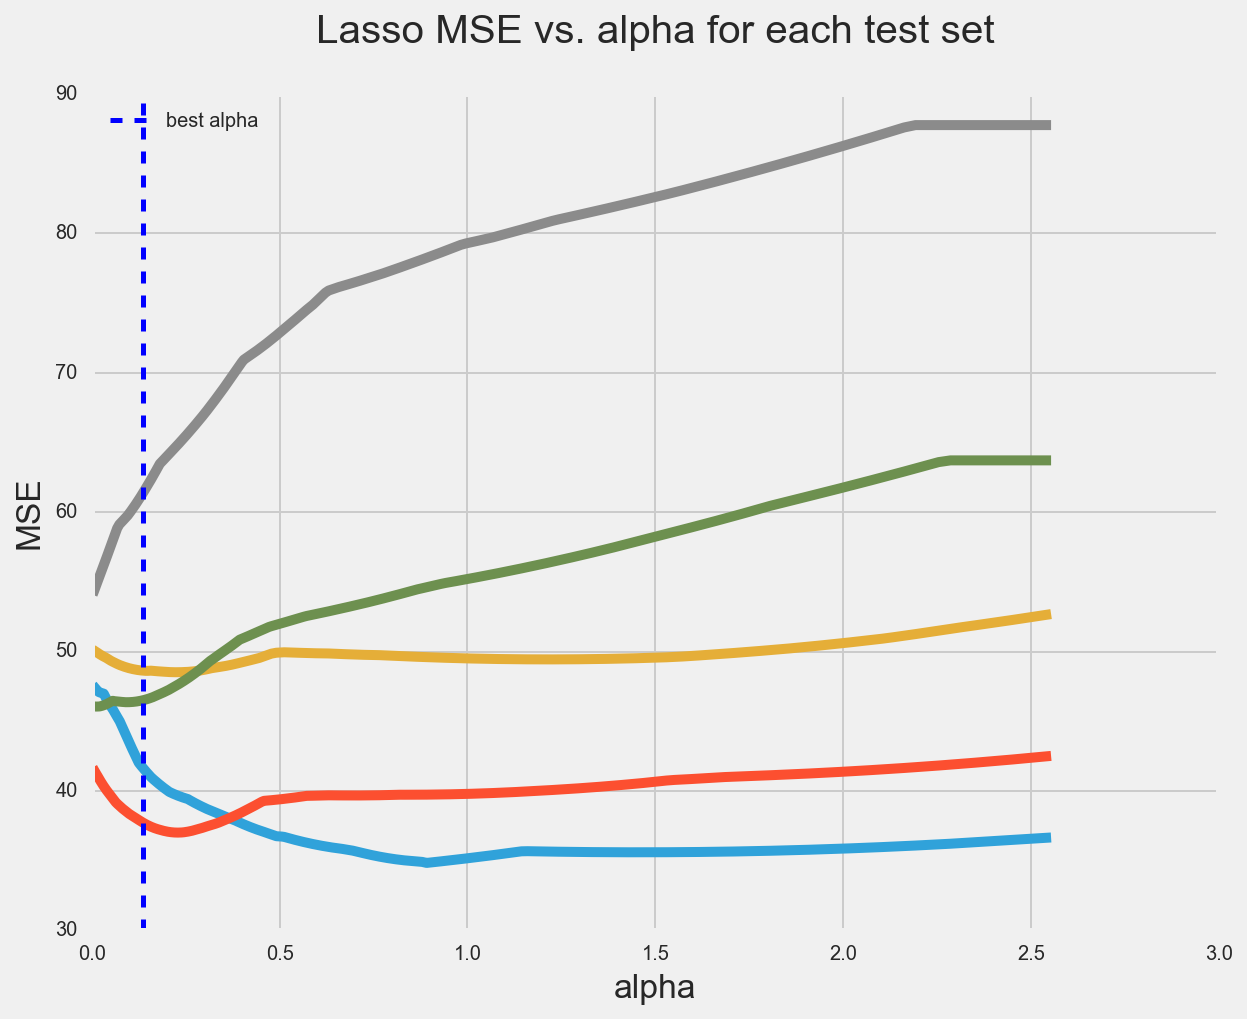

In [323]:
# I can pull out the mean squared error path for the folds as well as 
# the alphas from the CV class and plot them:
mses = lassocv.mse_path_
alphas = lassocv.alphas_

fig, ax = plt.subplots(figsize=(9,7))

ax.plot(alphas, mses, lw=5)
ax.axvline(lassocv.alpha_, lw=2.5, ls='dashed', label='best alpha')
ax.set_title('Lasso MSE vs. alpha for each test set\n')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')

plt.legend(loc='upper left')

plt.show()

In [324]:
# This is the same as the ridge coefficient by alpha calculator from
# my regularization lecture.
def lasso_coefs(X, Y, alphas):
    coefs = []
    lasso_reg = Lasso()
    for a in alphas:
        lasso_reg.set_params(alpha=a)
        lasso_reg.fit(X, Y)
        coefs.append(lasso_reg.coef_)
        
    return coefs

lcoefs = lasso_coefs(Xn, y, lassocv.alphas_)

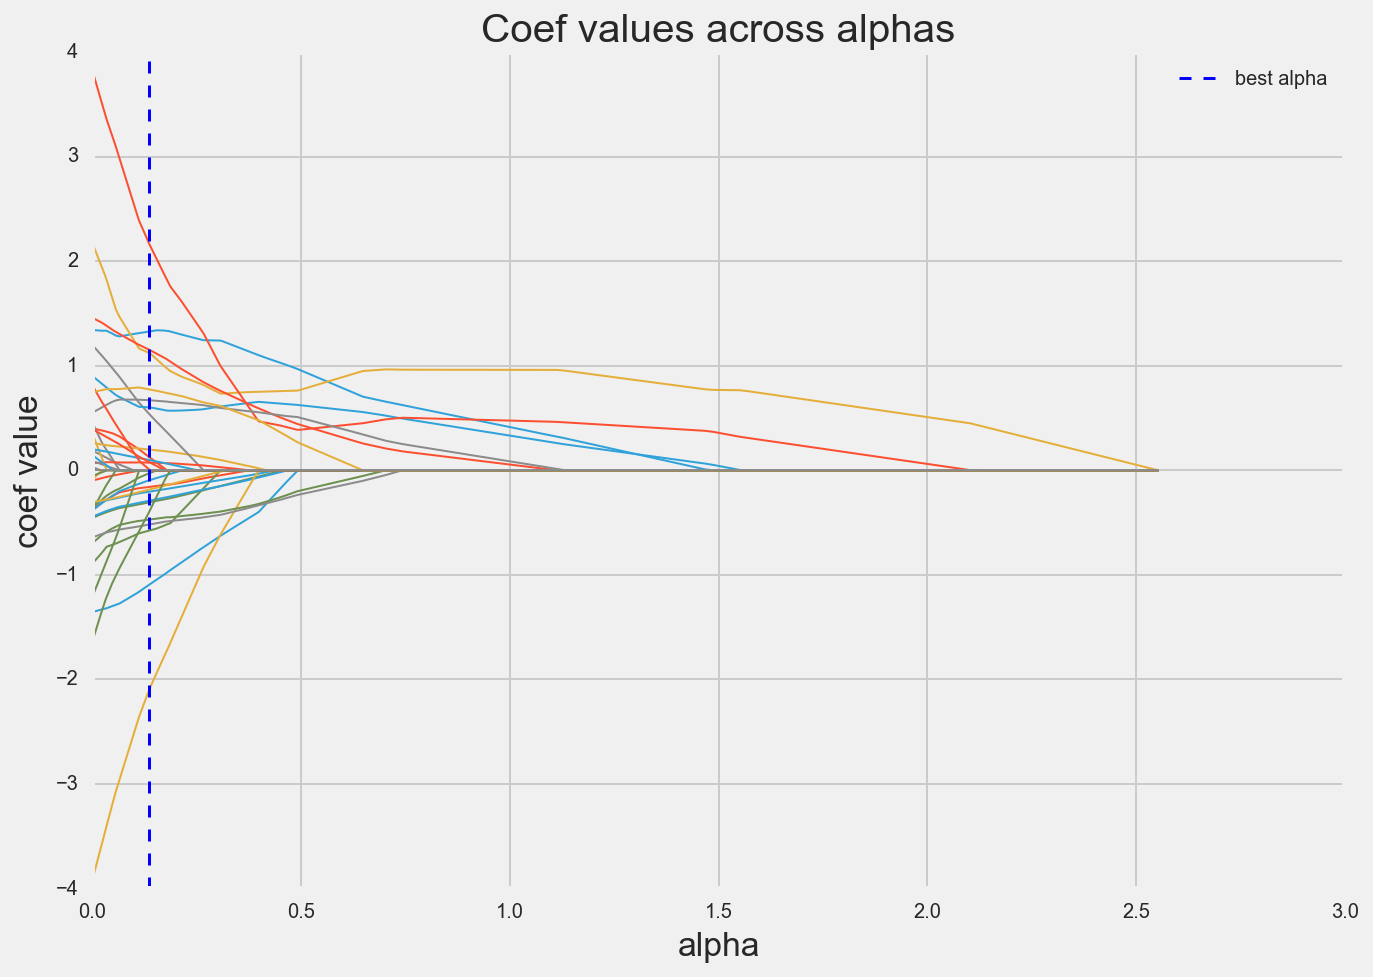

In [325]:
# Plot the coefficients across alpha values:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(alphas, lcoefs, lw=1.0)

ax.axvline(lassocv.alpha_, lw=1.5, ls='dashed', label='best alpha')

ax.set_title('Coef values across alphas')
ax.set_xlabel('alpha')
ax.set_ylabel('coef value')

plt.legend(loc='upper right')

plt.show()

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


In [326]:
# Lasso r2 calculator, like the coefficient one:
def lasso_r2s(X, y, alphas):
    r2s = []
    lasso_reg = Lasso()
    for a in alphas:
        lasso_reg.set_params(alpha=a)
        r2s.append(cross_val_score(lasso_reg, X, y, cv=10))
        
    return r2s

lr2s = lasso_r2s(Xn, y, lassocv.alphas_)

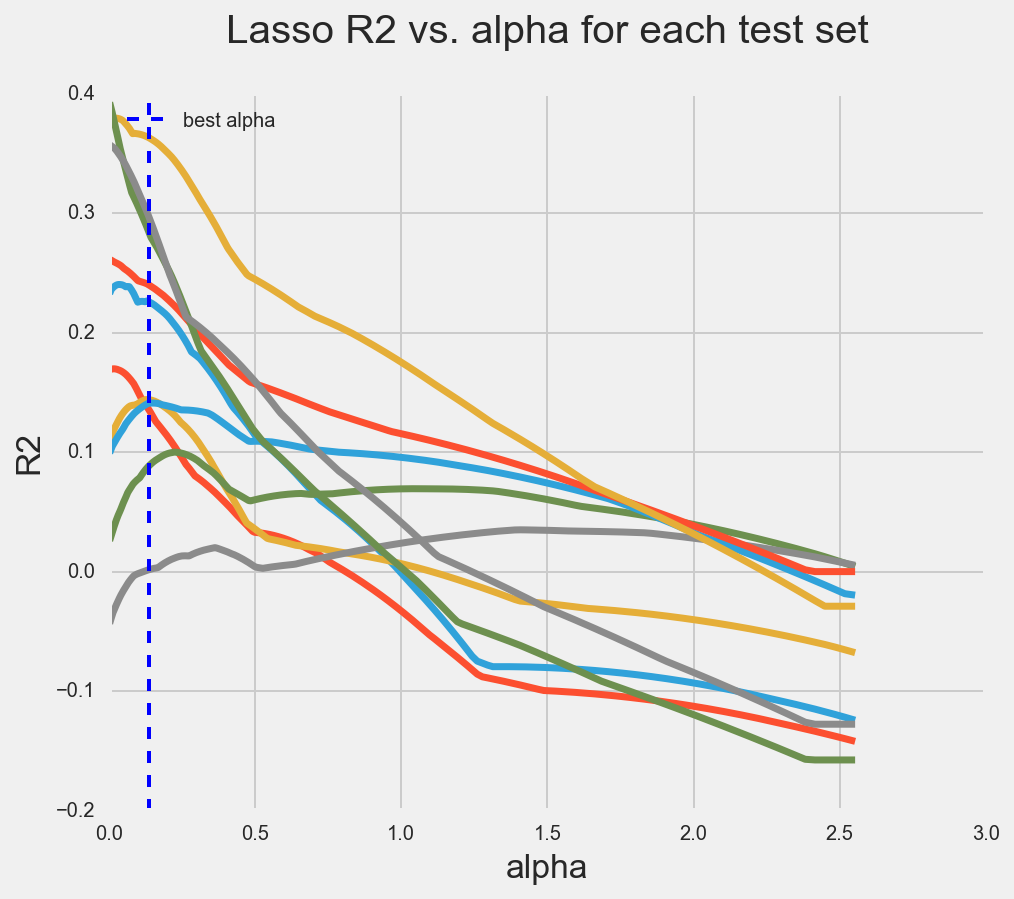

In [335]:
# Plot the CV r2 values as alpha changes:
alphas = lassocv.alphas_

fig, ax = plt.subplots(figsize=(7,6))

ax.plot(alphas, lr2s, lw=3.5)
ax.axvline(lassocv.alpha_, lw=2, ls='dashed', label='best alpha')
ax.set_title('Lasso R2 vs. alpha for each test set\n')
ax.set_xlabel('alpha')
ax.set_ylabel('R2')

plt.legend(loc='upper left')

plt.show()

**4.** Regularization, whether it be Lasso, Ridge, or Elastic Net, is increasing the bias by decreasing the complexity of the model. Remember that we are opting out of the "best" fit for our data right now because we think we are overfitting or improperly fitting in some way. To counter this, we put a penalty or penalties on the beta coefficients, preventing the minimization of the loss function from purely minimizing the least squares loss. Essentially, we end up with a "simpler" model. The betas are either shrunk down or zeroed out (or both).

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

In [328]:
# Just lifted these functions from my bias-variance lab:

def calculate_bias_sq(yhats_df):
    # Take out the true values of y that are in the first column:
    ytrue = yhats_df.iloc[:,0].values
    
    # Calculate the mean of the predictions, averaged across the columns.
    # So, all of the predictions for the true y at row 0 would be averaged together
    # and so on for all the rows.
    yhat_means = yhats_df.iloc[:,1:].mean(axis=1).values
    
    # Subtract the true value of y from the mean of the predicted values, and square it.
    elementwise_bias_sq = (yhat_means - ytrue)**2
    
    # Take the mean of those squared bias values (across all y)
    mean_bias_sq = np.mean(elementwise_bias_sq)
    return mean_bias_sq


def calculate_variance(yhats_df):
    # Calculate the mean of the predicted y's across the columns (mean of yhat for each row)
    yhats_means = yhats_df.iloc[:,1:].mean(axis=1)
    
    # subtract the mean of the yhats from the original yhat values (for each row)
    # and square the result. 
    yhats_devsq = yhats_df.iloc[:,1:].subtract(yhats_means, axis=0)**2
    
    # Take the mean of the squared deviations from the mean, then 
    # take the mean of those to get the overall variance across the y observations
    yhats_devsq_means = yhats_devsq.mean(axis=1).values
    return np.mean(yhats_devsq_means)

In [329]:
# Again, stolen from the bias-variance lab!

def predict_from_samples(model, X, y, number_of_splits=50, alpha=0.01):
    
    yhat_tracker = pd.DataFrame({'ytrue':y})
    
    rowinds = range(X.shape[0])
    
    for i in range(number_of_splits):
        
        train_inds, test_inds = train_test_split(rowinds, test_size=0.33)
                
        Xtrain, Ytrain = X[train_inds, :], y[train_inds]
        Xtest, Ytest = X[test_inds, :], y[test_inds]
        
        model.fit(Xtrain, Ytrain)
        yhats = model.predict(Xtest)
        
        yhat_tracker['sample'+str(i+1)] = np.nan
        yhat_tracker.iloc[test_inds, -1] = yhats
        
    return yhat_tracker



In [330]:
# Calculate the R2, approx. bias, and approx. variance at a series of 
# alpha values:
alphas = np.linspace(0.01, 0.4, 50)
r2s = []
biases = []
variances = []

lasso = Lasso()
for a in alphas:
    lasso.set_params(alpha=a)
    r2s.append(np.mean(cross_val_score(lasso, Xn, y, cv=10)))
    yhats = predict_from_samples(lasso, Xn, y, number_of_splits=50, alpha=a)
    biases.append(calculate_bias_sq(yhats))
    variances.append(calculate_variance(yhats))
    

In [331]:
print np.min(r2s), np.max(r2s)

0.127560139922 0.202019484389


In [332]:
# Scale the bias and variance to be between 0,1 
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler((0,1))

biases = mms.fit_transform(biases)
variances = mms.fit_transform(variances)

//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

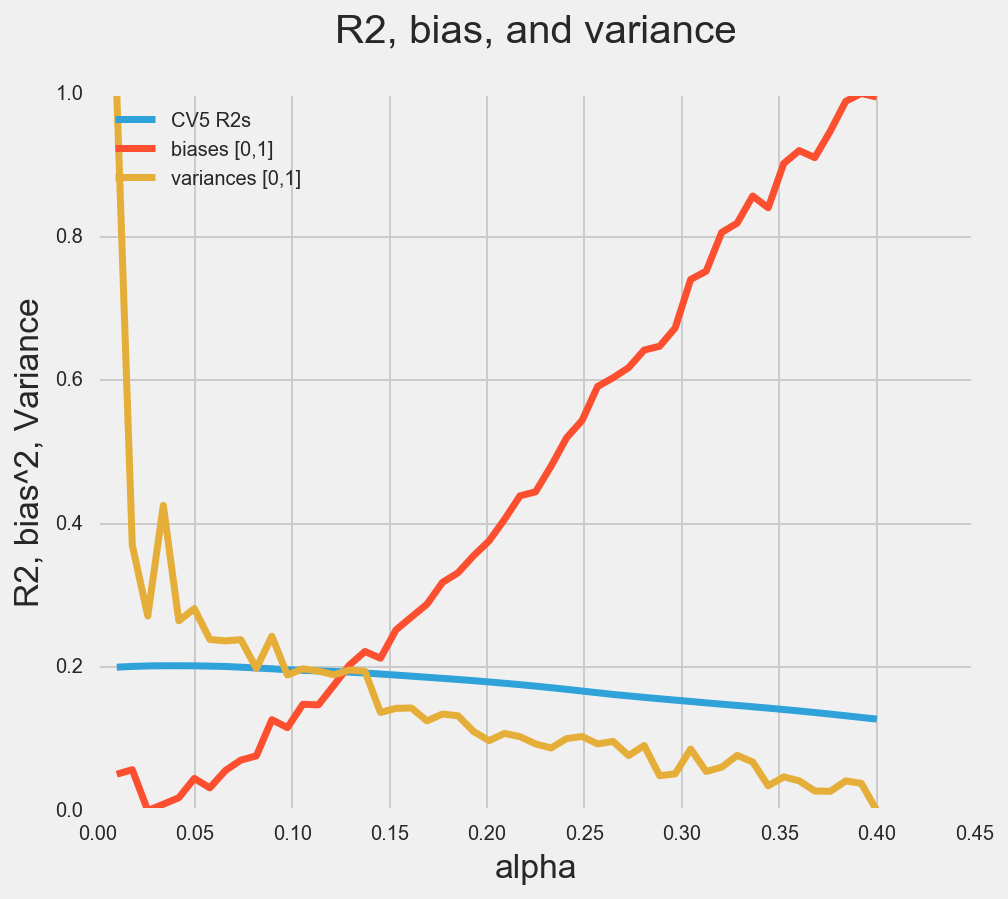

In [334]:
# Plot the bias, variance, and 
fig, ax = plt.subplots(figsize=(7,6))

ax.plot(alphas, r2s, lw=3.5, label='CV5 R2s')
ax.plot(alphas, biases, lw=3.5, label='biases [0,1]')
ax.plot(alphas, variances, lw=3.5, label='variances [0,1]')

ax.set_title('R2, bias, and variance\n')
ax.set_xlabel('alpha')
ax.set_ylabel('R2, bias^2, Variance')

plt.legend(loc='upper left')

plt.show()

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $l1$ and $l2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?